In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats

<b>1. Data Loading and Exploration</b>

In [3]:
data = pd.read_csv('AAPL, 1D 01012007-12072023.csv')
df = pd.DataFrame(data)
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [45]:
df['date'] = df['time'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))
df['date'] = df['date'].dt.date

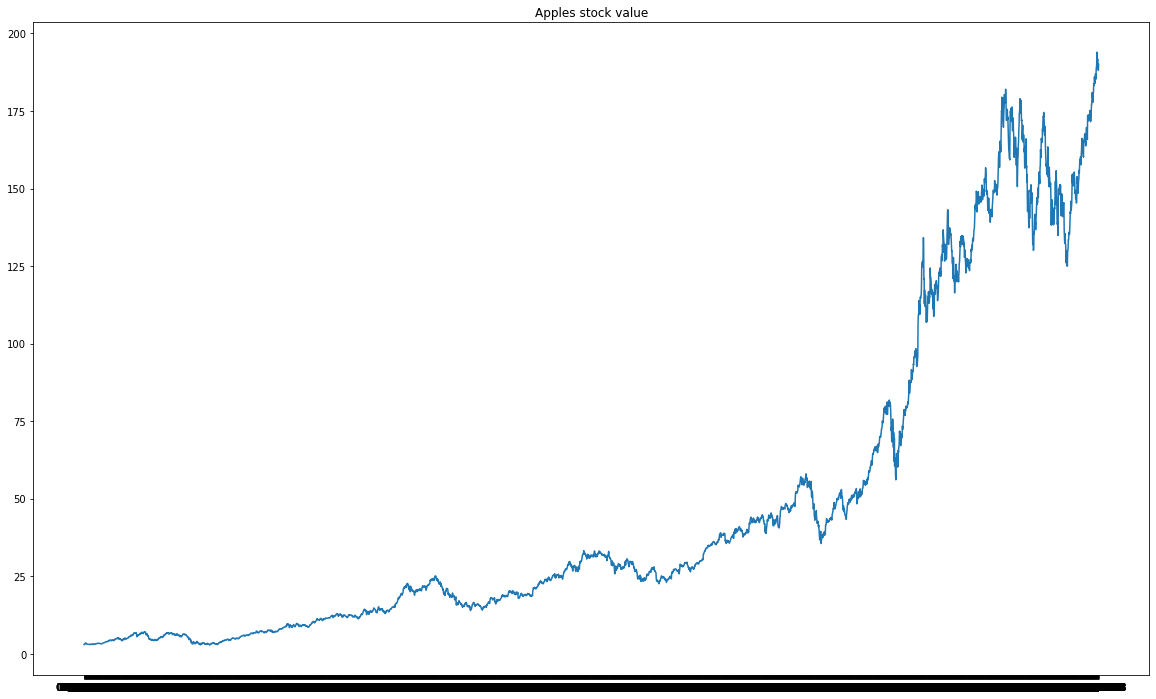

In [14]:
plt.figure(figsize=(20, 12))
plt.plot(df['date'], df['close'])
plt.title("Apples stock value")

plt.show()

The data frequency is daily<br>
The chart indicates a long-term bullish trend    

<b>2. Data Visualization</b>

In [15]:
df['rising_close'] = df['close'] > df['open']

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning:

The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()



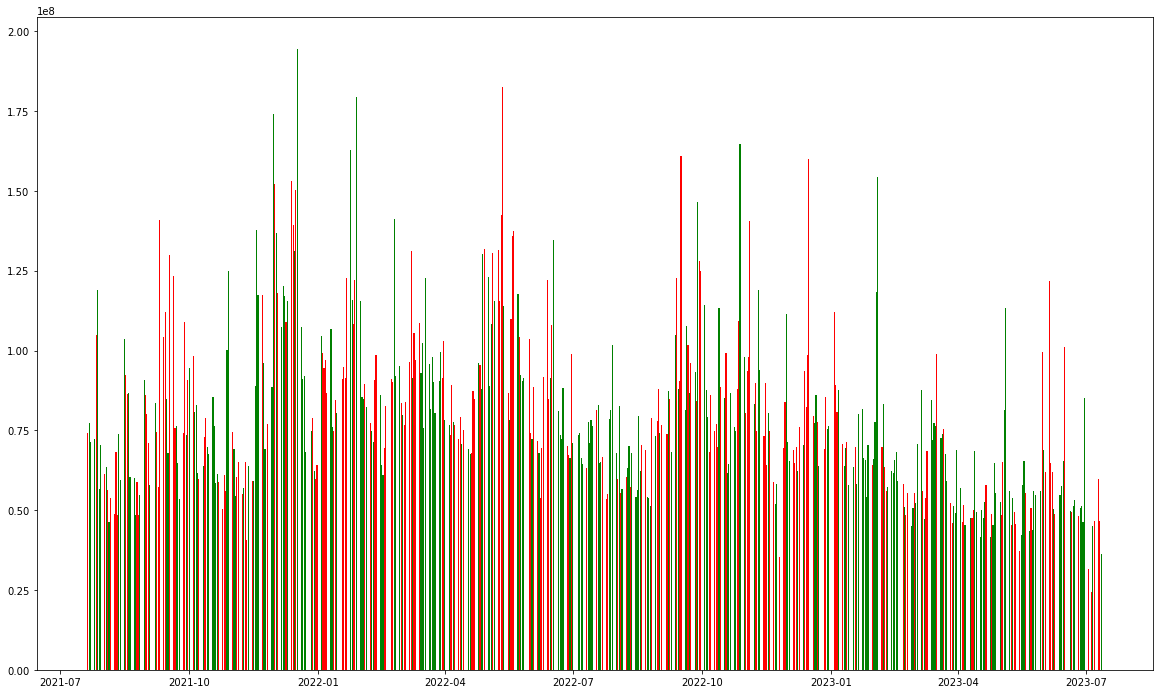

In [69]:
def assing_color(value):
    if value:
        return 'green'  
    else:
        return 'red' 

one_year_ago = pd.to_datetime('now') - pd.DateOffset(years=3)

df_volume = df[df['date']>=one_year_ago]
    
plt.figure(figsize=(20, 12))
plt.bar(df_volume['date'], df_volume['volume'], color=df_volume['rising_close'].apply(assing_color))
plt.show()

In [70]:
fig = go.Figure(data=[go.Candlestick(x=df_volume['date'],
                open=df_volume['open'], high=df_volume['high'],
                low=df_volume['low'], close=df_volume['close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<b>3. Statistical Analysis</b>

In [112]:
df['increase_percentage'] = (df['close'] - df['open']) / df['open'] * 100

In [123]:
def get_year(date):
    return date.year
def get_quarter(date):
    month = date.month
    if month < 4:
        return 1
    elif month < 7:
        return 2
    elif month < 10:
        return 3
    else:
        return 4

df["year"] = df["date"].map(get_year)
df["quarter"] = df["date"].map(get_quarter)

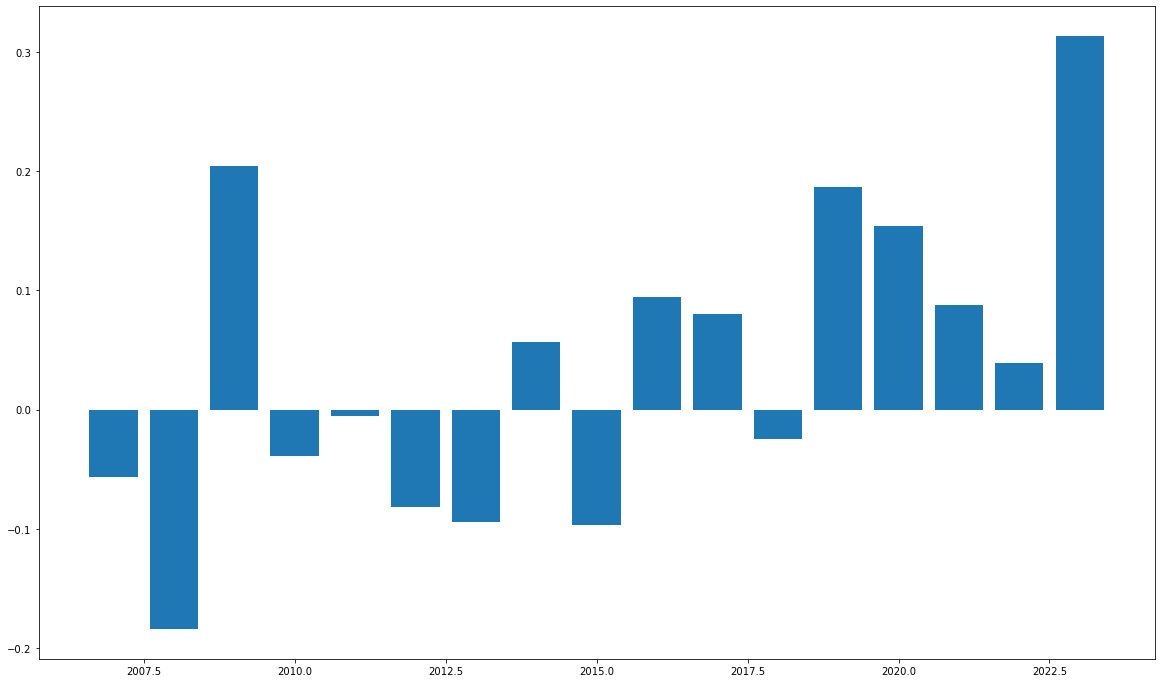

In [128]:
df_by_year = df.groupby('year')['increase_percentage'].mean().reset_index(name='increase_percentage')

plt.figure(figsize=(20, 12))
plt.bar(df_by_year['year'], df_by_year['increase_percentage'])
plt.show()

We can observe the daily average percentage of increase by year

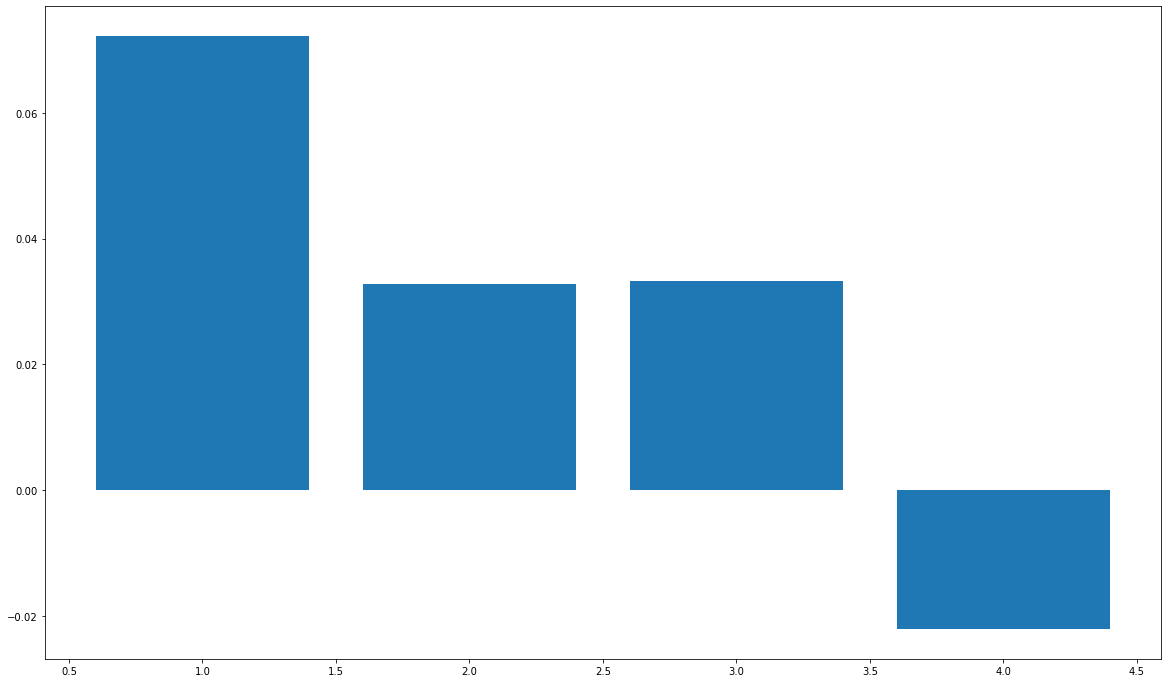

In [129]:
df_by_year = df.groupby('quarter')['increase_percentage'].mean().reset_index(name='increase_percentage')

plt.figure(figsize=(20, 12))
plt.bar(df_by_year['quarter'], df_by_year['increase_percentage'])
plt.show()

We can observer a curious pattern, in the first quarter of each year <br>
In the first quarter of the year since 2007 7 we have the highest average daily increase, while in the last quarter we have the only one that decreases

<b>4. Hypothesis Testing</b>

In [131]:
df_2007 = df[df['year'] == 2007]['increase_percentage']
df_2009 = df[df['year'] == 2009]['increase_percentage']

In [132]:
t_statistic, p_value = stats.ttest_ind(df_2007, df_2009)
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: -1.5640530278895266
p-value: 0.11843651519006207


According to the values ​​we can see that the average percentage increase in 2007 is lower than that of 2009, however there is not enough evidence to confirm this.

<b>6. Summary and Insights</b>

Apple is a company that has a long-term upward trend, so investing in it for several years can be considered a good investment.